<b> Principal Components Analysis </b>
<table style="width:50%">
<tr>
    <th>Mouse</th>    
    <th>Gene 1</th>
    <th>Gene 2</th>
    <th>Gene 3</th>
    <th>Gene 4</th>
</tr>
<tr>
    <th>1</th>
    <th>10</th>
    <th>6</th>
    <th>1.2</th>
    <th>5</th>
</tr>
<tr>
    <th>2</th>
    <th>11</th>
    <th>4</th>
    <th>9</th>
    <th>7</th>
</tr>
<tr>
    <th>3</th>
    <th>8</th>
    <th>5</th>
    <th>10</th>
    <th>6</th>
</tr>
<tr>
    <th>4</th>
    <th>3</th>
    <th>3</th>
    <th>2.5</th>
    <th>2</th>
</tr>
<tr>
    <th>5</th>
    <th>1</th>
    <th>2.8</th>
    <th>1.3</th>
    <th>4</th>
</tr>
<tr>
    <th>6</th>
    <th>2</th>
    <th>1</th>
    <th>2</th>
    <th>7</th>
</tr>
</table>

If we only measure Gene 1 how can I separate the mice? We can plot on a line

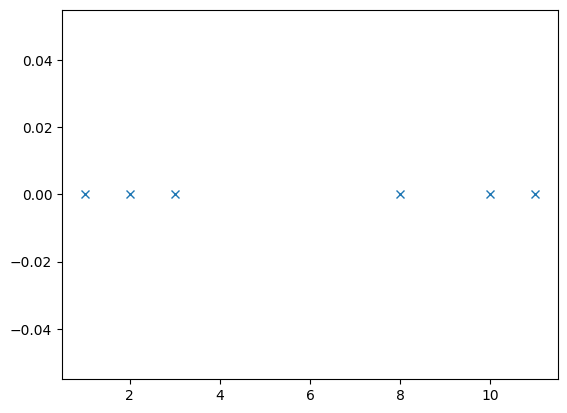

In [1]:
import numpy as np
from matplotlib import pyplot as plt
gene1 = [10, 11, 8, 3, 1 ,2]
val=0
plt.plot(gene1, np.zeros_like(gene1) + val, 'x')

Mice 1, 2 and 3 are more similar to each other than they are to mice 4, 5 and 6. If we measure 2 genes we can do a 2D plot of this.

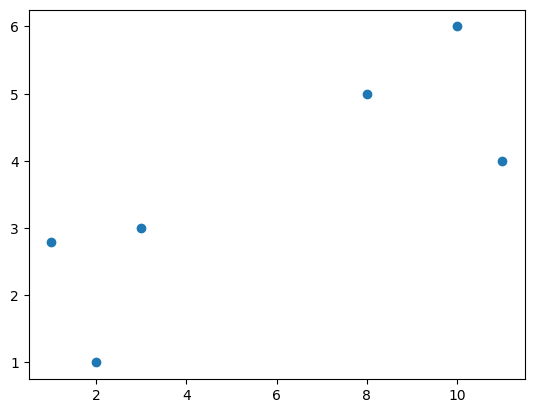

In [2]:
gene1 = [10, 11, 8, 3, 1 ,2]
gene2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(gene1, gene2)

<ul>
    <li> PCA can tell us which gene or variable is the most valuable for clustering data</li>
    <li> For example, PCA could tell is that Gene3 is responsible for separating samples along the x-axis</li>
    </ul>
    

To understand PCA we will consider the dataset with two genes.

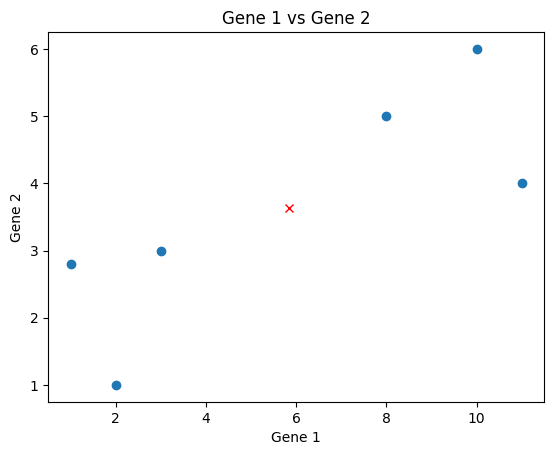

In [3]:
gene1 = [10, 11, 8, 3, 1 ,2]
gene2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(gene1, gene2)
plt.title("Gene 1 vs Gene 2")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
gene1average = np.average(gene1)
gene2average = np.average(gene2)
plt.plot(gene1average, gene2average, 'rx')


<ul>
    <li> Next calculate the average measurement for Gene 1 and the average measurement for Gene 2.</li>
    <li> With the average values we can calculate the centre of the data </li>
    <li> From this point, we will focus on what happens in the graph, we no longer need the original data </li>
    <li> We will shift the data so that the centre is at the origin</li>
    </ul>


In [4]:
gene1 = gene1 - gene1average
gene2 = gene2 - gene2average
print(gene1)
print(gene2)

[ 4.16666667  5.16666667  2.16666667 -2.83333333 -4.83333333 -3.83333333]
[ 2.36666667  0.36666667  1.36666667 -0.63333333 -0.83333333 -2.63333333]


Text(0, 0.5, 'Gene 2')

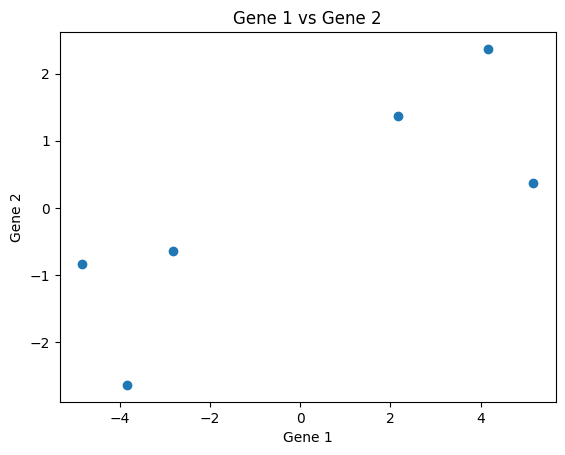

In [5]:
plt.scatter(gene1, gene2)
plt.title("Gene 1 vs Gene 2")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")

<ul>
    <li> Shifting the data did not change how the data points are positioned relative to each other</li>
    <li> Now that the data is centred at the origin we can try to fit a line to it</li>
    <li> Start with a random line through the origin and rotate until it fits as good as possible </li>
    <li> We need to talk about how PCA decides if a fit is good or not</li>
    <li> Consider the starting random line through the original </li>
    <li> To quantify how good this line fits the data, PCA project the data onto it and then it can either measure the distances from the data to the line and try to find the line that minimises distances or </li>
    <li> It can try to find the line that maximises the distances from the projected points to the origin</li>
    <li> $a^2 = b^2 + c^2$ since $a$ is fixed as $b$ gets bigger $c$ must get smaller and vice versa</li>
    <li> PCA can either minimise $b$ or maximise $c$ </li>
    <li> Intuitively it is more obvious to minimise $b$... but it is actually easier to calculate c, the distance from the projected point to the origin, so PCA finds the best line by maximising the sum of the squared distances from the projected points to the origin </li>
    <li> Rotate the line to find largest SS(distances) </li>
    <li> This line is called Principal Component 1 or PC1 for short </li>
<ul>
    

In [6]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(gene1, gene2)
print(slope)

0.32302284710017576


In [7]:
print(intercept)

-1.6964884226316686e-16


<ul>
    <li>PC1 has a slope 0.323. In other words for every 3 units that we go along the gene1 axis we go up 1 unit along the gene2 axis</li>
    <li>That means that the data is mostly spread out along the gene1 axis and only a little spread out along the gene2 axis</li>
    <li>To make PC1 we take 3 parts gene1 and 1 part gene2 </li>
    <li> The ration of gene1 to gene2 tells you tat gene1 is more important when it comes to describing how spread out the data is</li>
    <li> PC1 is a linear combination of gene1 and gene2 </li>
    <li> When you do PCA with Singular Value Decompostition (SVD), the recipe for PC1 is scaled so tat its length is 1 in our case we need by $sqrt(10)$</li>
    <li> $PC1 = \frac{3}{\sqrt(10)}gene1 + \frac{1}{\sqrt(10)}gene2$</li>
    <li> The unit vector is called the Singular Vector or the eigenvector of PC1 </li>
    <li> The proportions of each gene are called "Loading Scores"</li>
    <li> PCA calls the average of the SS(distances) for the best fit line the eigenvalue for PC1</li>
    <li>$\frac{SS(distances for PC1)}{n-1} = Eigenvalue for PC1$ </li>
    <li>$\sqrt(SS(distances for PC1) = Singular value for PC1$</li>
    <li>Because this example is 2D, PC2 is simply the line through the origin that is perpendicular to PC1</li>
    <li>$PC2 = -1gene1 + 3gene2$</li>
    <li>Scaling to unit vector $PC2 = \frac{-1}{\sqrt(10)}gene1 + \frac{3}{\sqrt(10)}gene2$</li>
    <li> For PC2 gene2 is 3 times as important as gene1</li>
    </ul>

<ul>
    <li> To draw the final PCA plot rotate everything so that PC1 is horizontal. Then we can use the projected points to see where the sample points are in the pca plot</li>
    <li> Eigenvalues are measures of variation </li>
    <li> For the sake of this example imagine that the variation for PC1 is 15 and the variation for PC2 = 3</li>
    <li> Total variation is 15+3 = 18</li>
    <li> This means that PC1 accounts for 15/18=83% of the total variation around the PCs </li>
    <li> A scree plot is a graphical representation of the percentages of variation that PC accounts for </li>
    </ul>

<b> PCA with 3 variables </b>
<ul>
    <li> Centre the data </li>
    <li> Find the line of best fit that goes through the origin - PC1</li>
    <li> $PC1 = 0.62gene1+0.15gene2+0.77gene3$ </li>
    <li> PC2 is the next best fitting line that goes through the origin and is at right angles to PC1</li>
    <li> $PC2 = 0.77gene1 + 0.62gene2+0.15gene3$</li>
    <li>PC3 is the best fitting line through the origin that is orthogonal to PC1 and PC2</li>
    <li> In theory there is one PC per gene (or variable) but in practice, the number of PCs is either te number of variables or the number of samples, whichever is smaller</li>
    <li> Once we have all of the PCs we can use the eigenvalues to determine the proportion of variation that PC accounts for for</li>
    <li> Suppose PC1 accounts for 79%, PC2 for 15%, and PC3 for 6%</li>
    </ul>

In [8]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

/tmp/ipykernel_728/2208086537.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
genes = ['gene'+str(i) for i in range(1, 101)]
wt = ['wt'+str(i) for i in range(1, 6)]
ko = ['ko'+str(i) for i in range(1, 6)]

In [10]:
data = pd.DataFrame(columns=[*wt, *ko], index = genes)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [12]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1   90   77   71   88   85  113  130  107  135  132
gene2  343  333  307  355  318  891  856  861  856  995
gene3  577  625  618  596  636  374  391  377  368  391
gene4  819  857  889  776  834   68   73   75   91   77
gene5  365  386  376  389  385  895  976  909  905  906


In [13]:
print(data.shape)

(100, 10)


In [14]:
scaled_data = preprocessing.scale(data.T)

In [15]:
print(scaled_data)

[[-0.56526605 -0.9485131   0.70274506  0.9553269  -1.05311307 -1.0800567
   1.04486241 -0.98897668  1.03028336 -0.75621168 -0.99509093 -1.28804309
   0.99207354 -1.032458    0.93276883 -0.83741111 -1.00995517  1.08972705
  -1.09623755 -0.93493744  0.85196888 -1.10498569 -1.04111528  0.87626401
   1.29896295 -1.06268733 -1.60516307 -0.37950612  0.44207578 -1.76355025
   1.46610706 -1.01360135 -1.10154979 -0.90304162 -1.05454784 -1.03082687
  -0.96993042  0.79243898 -0.05301552 -1.08849358  0.90118521 -0.91349791
  -1.06723515  1.1364306   0.75618784 -0.98999376  0.79408203 -0.68826629
   1.19353514  0.84698444 -0.93654933  1.25093103  0.93077652  0.98636463
   0.96074344 -1.11117667  0.93273282  0.97737356 -1.03978716 -1.08170095
   0.8835006  -1.04113336  0.10773229 -0.97789066  1.34839768  1.16177278
   1.00335393  1.04604133  0.90084567  0.22263259 -0.99959992  1.06874672
   1.14597133  0.73899727 -1.20027764 -0.98920866 -1.0200085   1.13685767
   1.05116239  0.95414926 -0.8892791  -

In [16]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var
pca_data


array([[ 9.50854319e+00,  3.76330082e-01, -1.68841856e+00,
        -1.03208042e+00, -1.32394803e+00, -3.67976377e-02,
         1.75857983e+00, -1.98672598e-01, -2.85172178e-01,
         2.22044605e-16],
       [ 9.35101107e+00,  1.12158910e-01,  1.52018625e+00,
        -1.07714513e+00,  2.68306936e-01,  1.58601205e+00,
        -3.26977639e-01,  1.12631851e+00, -1.82700530e-01,
         0.00000000e+00],
       [ 9.75487790e+00, -2.65678234e+00,  7.17856149e-01,
         5.08945819e-01,  1.84269877e+00, -9.40643681e-01,
         2.59569776e-01, -3.48713912e-01, -4.94942100e-01,
         3.33066907e-16],
       [ 9.18864552e+00, -7.16764836e-01, -1.22713535e+00,
         2.32366373e-01, -1.64410674e-01,  7.76937470e-01,
        -9.85212864e-01, -7.65207635e-01,  1.13800582e+00,
         2.22044605e-16],
       [ 9.72109530e+00,  2.90598445e+00,  6.02987099e-01,
         1.32006034e+00, -6.00499335e-01, -1.33459370e+00,
        -7.31289774e-01,  1.89333288e-01, -1.55024827e-01,
         1.

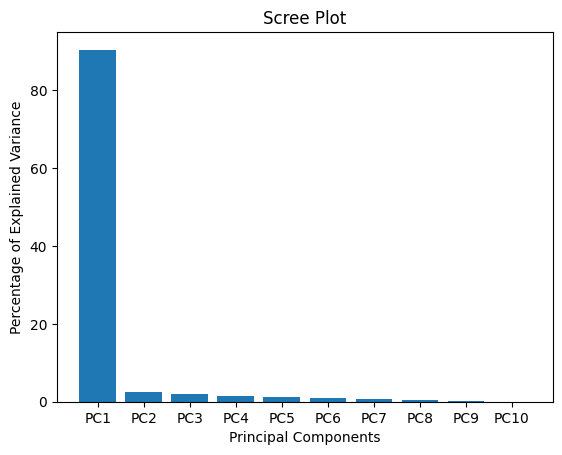

In [17]:
labels=['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.show()

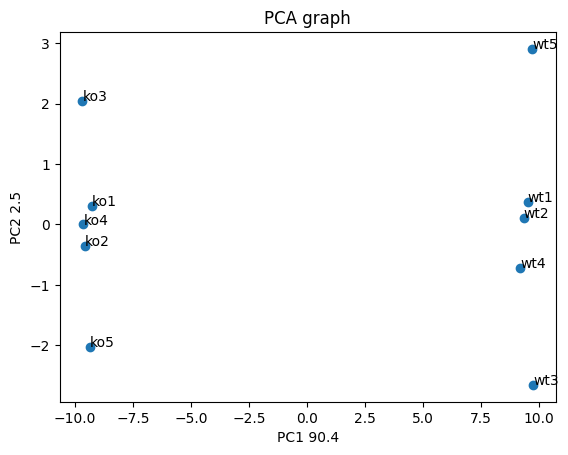

In [18]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f'PC1 {per_var[0]}')
plt.ylabel(f'PC2 {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [19]:
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

gene1     -0.095834
gene2     -0.104096
gene3      0.104227
gene4      0.104970
gene5     -0.104875
             ...   
gene96    -0.102093
gene97    -0.098964
gene98    -0.104740
gene99     0.104821
gene100   -0.105048
Length: 100, dtype: float64

In [20]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
top_10_genes

array(['gene77', 'gene68', 'gene15', 'gene62', 'gene8', 'gene7', 'gene9',
       'gene88', 'gene41', 'gene83'], dtype=object)

<b> PCA on MNIST </b>
<ul>
    <li> MNIST data has redundant pixels. Getting ride of redundant pixels will </li>
    <li> Faster training training and inference</li>
    <li> Data visualization easier </li>
    <li> PCA is a process of figuring out the most important features that have the most impact on the target variable </li>
    <li> Scale features before applying PCA </li>
    <li> Accuracy might drop </li>
    </ul>
    
    

In [21]:
import pandas as pd
from sklearn.datasets import load_digits

In [22]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [23]:
dataset.data.shape

(1797, 64)

In [24]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [25]:
dataset.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

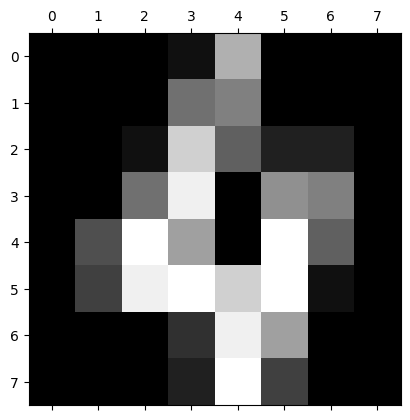

In [26]:
from matplotlib import pyplot as plt
plt.gray()
plt.matshow(dataset.data[4].reshape(8,8))


In [27]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [28]:
dataset.target[0]

0

In [29]:
import numpy as np
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [31]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [32]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [33]:
X = df
y = dataset.target

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [37]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 54)

In [38]:
X_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.12875948,
        -0.10836118,  0.01791386],
       [ 0.58898033,  0.9246358 ,  3.92475494, ..., -0.06281057,
        -0.04847131,  0.39530474],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.00678432,
        -0.08145492,  0.31096665],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ..., -0.3719933 ,
         0.60645363, -0.2940029 ],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.03681226,
         0.2276726 ,  0.37771634],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38985211,
         0.1880376 , -0.08888721]])

In [39]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163,
       0.00406053, 0.00397085, 0.00356493, 0.00340787, 0.00327835,
       0.00311032, 0.00288575, 0.00276489, 0.00259175, 0.00234483,
       0.00218257, 0.00203598, 0.00195512, 0.00183318])

In [40]:
pca.n_components_

54

In [41]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 2)

In [45]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [46]:
# Get fma_metadata.zip data from https://github.com/mdeff/fma
# Use 7-Zip to unzip fma_metadata.zip

In [47]:
import pandas as pd
data = pd.read_csv('echonest.csv', skiprows=3)

FileNotFoundError: [Errno 2] No such file or directory: 'echonest.csv'

In [ ]:
data.drop(columns=data.columns:26], inplace=True)
data.head()

In [ ]:
scaled_data = preprocessing.scale(data)

In [ ]:
pca = PCA(0.99)

In [ ]:
X_pca = pca.fit_transform(scaled_data)

In [ ]:
X_pca.shape

__Advanatages and disadvantages of PCA__

__Advantages__
- This would be a good exam question
- __Dimensionality reduction:__ By reducing the number of variables PCA simplifies data analysis, improves performance and makes it easier to visualise data.
- __Feature selection:__ PCA can be used for feature selection, which is the process of selecting the most important variables in a dataset. This is useful in machine learning where the number of variables can very large, and it is difficult to identify the most important variables.
- __Data Visualisation:__ PCA can be used for data visualisation, by reducing the number of variables, PCA can plot high-dimensional data in 2 or 3 dimensions, making it easier to interpret.
- __Multicolinearity:__ PCA can be used to deal with multicolinearity, which is a common problem in regression analysis where two or more independent variables are strongly correlated. PCA can help identify the underlying structure in the data and create new uncorrelated variables that can be used in the regression model.
- __Noise Reduction:__ PCA can be used to reduce noise in data. By removing the principle components with low variance, which are assumed to represent noise; PCA can improve the signal to noise ratio and make it easier to identify the underlying structure in the data
- __Data Compression:__ PCA can be used for data compression. By representing the data using a smaller number of principal components, which capture most of the variation in the data. PCA can reduce the storage requirments and speed up processing.
- __Outlier Detection:__ PCA can be used for outlier detection. Outliers are points that are significantly different from the other points in the dataset. PCA can identify these outliers by looking for data points that are far away from other points in the principal component space.

__Disadvantages__

- __Interpretation of the Pricipal Components:__ The principle components created by PCA are linear combinations of the original variables and it is often difficult to interpret them in terms of the original variables. This can make it difficult to explain the results of PCA to others.
- __Data Scaling:__ PCA is sensitive to the scale of the data. It is important to scale the data before doing PCA.
- __Information Loss:__ PCA can result in information loss. While PCA reduces the number of variables, it can lead to loss of information. The degree of information loss depends on the number  of principal components selected. Therefore, it is important to carefully select the principal components to retain.
- __Non-linear Relationships:__ PCA assumes that the relationships between variables are linear. If there are non-linear relationships between variables PCA won't work well.
- __Computational Complexity:__ Computing PCA can be computationaly expensive for large datasets. This is especially true if the number of variables in the dataset is large. For n point in p features $0(p^2n+p^3)$
- __Overfitting:__ PCA can sometime result in overfitting, which is when the model fits the training data too well and doesn't generalize. This can happen if too many principal components are used or the model is trained on too small a dataset.